In [1]:
import pandas as pd
from pandas_datareader import data as pdr
import numpy as np
import datetime as date
import matplotlib.pyplot as plt

In [3]:
startdate = date.datetime(2019, 3, 20)
enddate = date.datetime(2020, 3, 20)
tag = 'PE&OLES.MX'
data = pdr.get_data_yahoo(tag, start = startdate, end = enddate)

In [4]:
data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-03-20,251.309998,234.550003,234.550003,249.559998,287708.0,240.693558
2019-03-21,255.000000,246.389999,249.100006,253.589996,216214.0,244.580383
2019-03-22,253.899994,240.050003,253.899994,244.899994,186102.0,236.199112
2019-03-25,250.000000,242.830002,245.000000,249.490005,92684.0,240.626053
2019-03-26,250.039993,242.050003,248.770004,242.529999,191008.0,233.913330


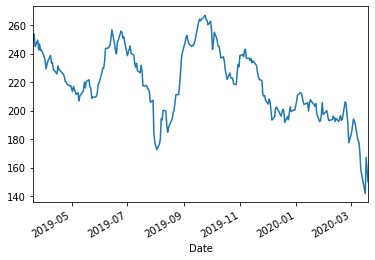

In [5]:
%matplotlib inline 
data.Close.plot()

In [6]:
def OM(df, n):
    M = pd.Series(df['Close'].diff(n), name = 'Momentum_' + str(n))
    df = df.join(M)
    return df

In [7]:
df = OM(data, 50)

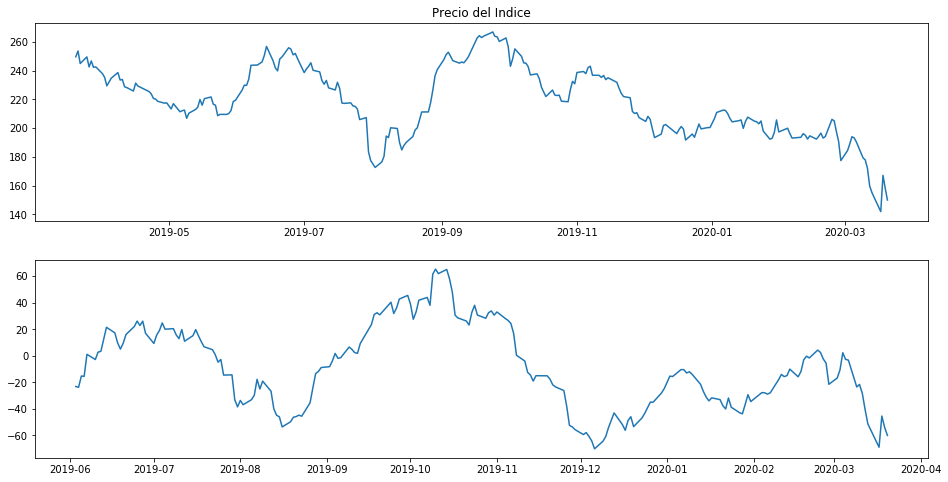

In [8]:
fig = plt.figure(figsize = (16,8))
plt.subplot(2, 1, 1)
plt.plot(df.Close)
plt.title('Precio del Indice')
plt.subplot(2, 1, 2)
plt.plot(df.Momentum_50)
plt.show()

In [9]:
def ROC(df, n):
    M = df['Close'].diff(n - 1)
    N = df['Close'].shift(n - 1)
    ROC = pd.Series(M/N, name = 'ROC_' + str(n))
    df = df.join(ROC)
    return df

In [10]:
df2 = ROC(data, 50)

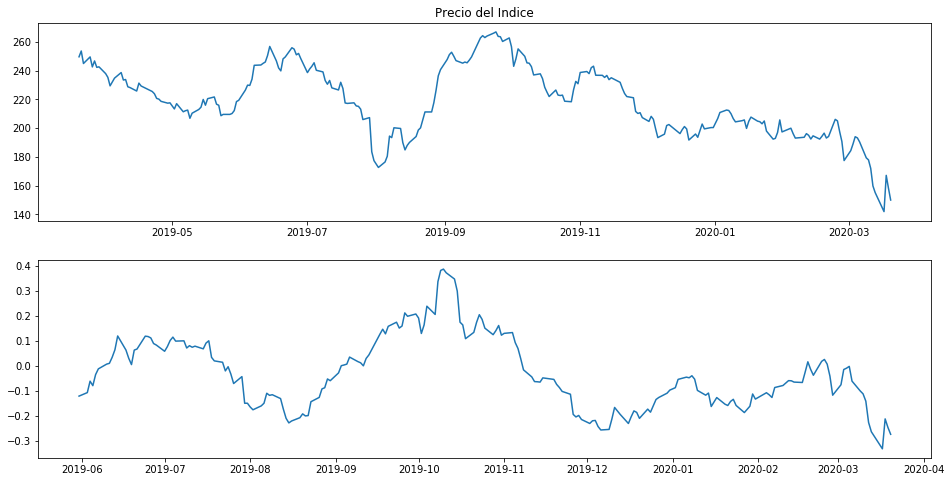

In [11]:
fig = plt.figure(figsize = (16,8))
plt.subplot(2, 1, 1)
plt.plot(df2.Close)
plt.title('Precio del Indice')
plt.subplot(2, 1, 2)
plt.plot(df2.ROC_50)
plt.show()

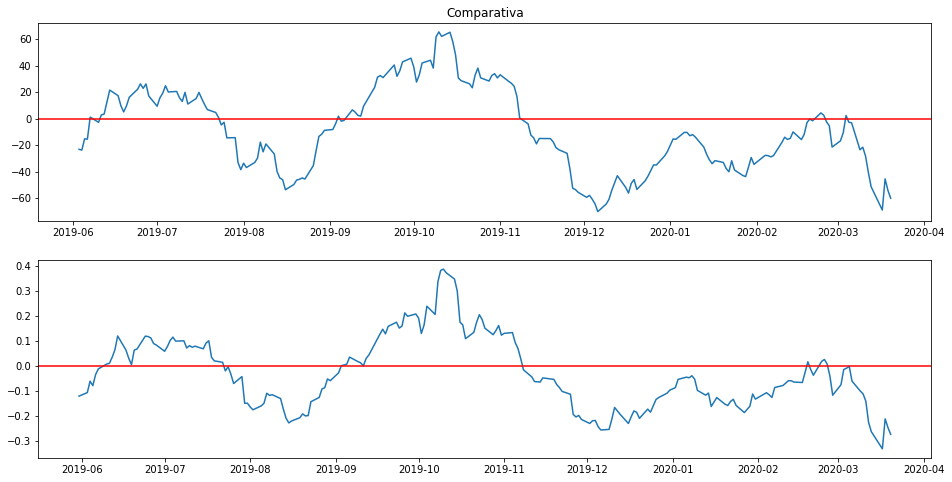

In [12]:
fig = plt.figure(figsize = (16,8))
plt.subplot(2, 1, 1)
plt.plot(df.Momentum_50)
plt.axhline(y=0, color= 'r')
plt.title('Comparativa')
plt.subplot(2, 1, 2)
plt.plot(df2.ROC_50)
plt.axhline(y=0, color= 'r')
plt.show()